In [46]:
import pandas as pd

accounts = ['Konto', 'Kasse']

df = pd.read_csv('finanzen.csv', sep=';')

df

,Datum,Typ,Von/Nach,Text,Wert,KontenArt
0,2020-10-01,Einnahme,Konto,Gehalt,500.00,Konto
1,2020-10-01,Ausgabe,Konto,Miete,-300.00,Konto
2,2020-11-01,Einnahme,Konto,Gehalt,500.00,Konto
3,2020-11-20,Umbuchung,Konto,Auf Kasse,-50.00,Konto
4,2020-11-20,Umbuchung,Kasse,Von Konto,50.00,Kasse
5,2020-11-23,Ausgabe,Kasse,Glühwein,-5.00,Kasse
6,2020-11-23,Ausgabe,Kasse,Tochter Geschenk,-14.99,Kasse


In [32]:
print('Kontostände')

for account in accounts:
    print(account, ':', df[df.KontenArt == account][['Wert']].sum().values[0].round(2))

Kontostände
Konto : 650.0
Kasse : 30.01


In [33]:
kontoDf = df[df.KontenArt == 'Konto']
kontoDf[['Wert']].sum().values[0]

650.0

<AxesSubplot:xlabel='KontenArt'>

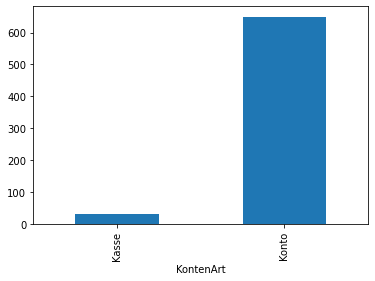

In [34]:
df.groupby('KontenArt')['Wert'].sum().plot(kind = 'bar')

In [48]:
print('Aktueller Monat')
df['Datum'] = pd.to_datetime(df['Datum'], format="%Y-%m-%d")

mask = (df['Datum'] >= '2020-11-1') & (df['Datum'] <= '2020-11-30')
dfMonth = df.loc[mask]

print('Einnahmen: ', dfMonth[dfMonth.Typ == 'Einnahme'][['Wert']].sum().values[0])
print('Ausgabe: ', dfMonth[dfMonth.Typ == 'Ausgabe'][['Wert']].sum().values[0] * -1)

Aktueller Monat
Einnahmen:  500.0
Ausgabe:  19.990000000000002


In [50]:
for account in accounts:
    print(account, 'neuste Eingänge')
    print(df[df.KontenArt == account].tail(5))
    print('----')

Konto neuste Eingänge
       Datum        Typ Von/Nach       Text   Wert KontenArt
0 2020-10-01   Einnahme    Konto     Gehalt  500.0     Konto
1 2020-10-01    Ausgabe    Konto      Miete -300.0     Konto
2 2020-11-01   Einnahme    Konto     Gehalt  500.0     Konto
3 2020-11-20  Umbuchung    Konto  Auf Kasse  -50.0     Konto
----
Kasse neuste Eingänge
       Datum        Typ Von/Nach              Text   Wert KontenArt
4 2020-11-20  Umbuchung    Kasse         Von Konto  50.00     Kasse
5 2020-11-23    Ausgabe    Kasse          Glühwein  -5.00     Kasse
6 2020-11-23    Ausgabe    Kasse  Tochter Geschenk -14.99     Kasse
----


In [ ]:
input('Neue Ausgabe?')